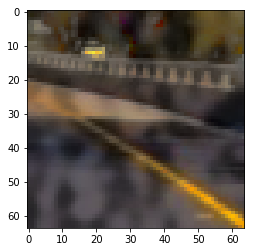

In [177]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import math
import matplotlib.image as mpimg

def generateRandomNoise():
    img = np.random.randint(0, 200, size=(64,64), dtype=np.uint8)
    img = cv2.GaussianBlur(img,(13,13),0)
    img = cv2.equalizeHist(img)
    return img;

def GenerateShadowImage(img):
    img = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    noise = generateRandomNoise()

    img[:,:,1] = cv2.addWeighted(img[:,:,1], 0.5, noise, 0.2, 0)

    img = cv2.cvtColor(img, cv2.COLOR_HLS2RGB)
    return img

img = mpimg.imread("non-vehicles/extras/extra40.png")
img = 255 * img
img = img.astype(np.uint8)

img = GenerateShadowImage(img)

flipped = np.zeros_like(img)

cv2.flip(img, 1, flipped)

plt.imshow(flipped, cmap='gray')
plt.show()